This notebook is for generating figures for abstract_1 draft for HRS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from hrs_23_figures import *

from sklearn import metrics

ModuleNotFoundError: No module named 'pyvista'

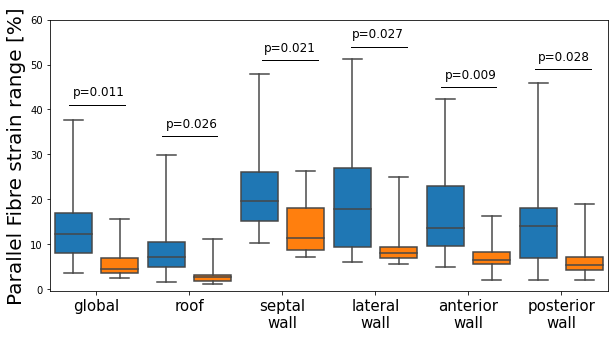

In [3]:
## fibre strain range boxplots across all 5 regions and globally

## Set fibre arch
## Set fibre component
arch='endo_avg'
component=0

## Retrieve data in array
## N_cases, N_regions, N_fcomponents, N_time
nonAF_strains = np.zeros((19,6,2, 10))
AF_strains = np.zeros((10,6,2, 10))

regions = ['global', 'roof', 'sept', 'lat', 'ant', 'post']

for i in range(0,len(regions)):     # region
    for j in range(0,nonAF_strains.shape[0]):    # case
        for k in range(0,2):   # component
            nonAF_strains[j,i,k, :] = retrieve_fibres_data(nonaf_cases[j], fibre_arch=arch, region=regions[i], component=k)

for i in range(0,len(regions)):     # region
    for j in range(0,AF_strains.shape[0]):    # case
        for k in range(0,2):   # component
            AF_strains[j,i,k, :] = retrieve_fibres_data(af_cases[j], fibre_arch=arch, region=regions[i], component=k) 

## Get strain ranges
nonAF_ranges = np.ptp(nonAF_strains, axis=3)
AF_ranges = np.ptp(AF_strains, axis=3)

## Plotting

fig, ((ax1)) = plt.subplots(1,1,figsize=(10,5), facecolor='white', sharey=True)

data_to_plot= [nonAF_ranges[:,0,component], AF_ranges[:,0,component],
               nonAF_ranges[:,1,component], AF_ranges[:,1,component],
               nonAF_ranges[:,2,component], AF_ranges[:,2,component],
               nonAF_ranges[:,3,component], AF_ranges[:,3,component],
               nonAF_ranges[:,4,component], AF_ranges[:,4,component],
               nonAF_ranges[:,5,component], AF_ranges[:,5,component]]

sns.boxplot(data=data_to_plot, orient='v', ax=ax1, whis=(0, 100))

regions_axis=['global', 'roof', 'septal\nwall', 'lateral\nwall', 'anterior\nwall', 'posterior\nwall']

# ax1.set_ylabel(f"f{component+1} Fibre strain range [%]", fontsize=20)
ax1.set_ylabel(f"Parallel Fibre strain range [%]", fontsize=20)
ax1.set_xticks(ticks=np.arange(0.5,11.5,2))
ax1.set_xticklabels(regions_axis, fontsize=15)
plt.ylim(-0.5, 60)

for i in range(0, 12, 2):
    mybox = ax1.artists[i]
    mybox.set_facecolor('tab:blue')

for i in range(1, 13, 2):
    mybox = ax1.artists[i]
    mybox.set_facecolor('tab:orange')
    
## Calculate p values and plot
p_vals = np.zeros((6,))

for i in range(0, 6):
    ## indexing as follows: p_vals; region; f1 component
    p_vals[i]=stats.ttest_ind(nonAF_ranges, AF_ranges)[-1][i][0]

## Plotting p_values
plt.text(0.0, 43, f'p={str(np.round(p_vals[0],3))}', size=12)
plt.text(2, 36, f'p={str(np.round(p_vals[1],3))}', size=12)
plt.text(4.1, 53, f'p={str(np.round(p_vals[2],3))}', size=12)
plt.text(6, 56, f'p={str(np.round(p_vals[3],3))}', size=12)
plt.text(8, 47, f'p={str(np.round(p_vals[4],3))}', size=12)
plt.text(10, 51, f'p={str(np.round(p_vals[5],3))}', size=12)

## horizontal lines
low_1=0.035
len_line=0.1
plt.axhline(41, low_1,low_1+len_line, c='black', lw=1)

low_2=0.2
low_3=0.38
low_4=0.54
low_5=0.7
low_6=0.87

plt.axhline(34, low_2,low_2+len_line, c='black', lw=1)
plt.axhline(51, low_3,low_3+len_line, c='black', lw=1)
plt.axhline(54, low_4,low_4+len_line, c='black', lw=1)
plt.axhline(45, low_5,low_5+len_line, c='black', lw=1)
plt.axhline(49, low_6,low_6+len_line, c='black', lw=1)

# sns.set_style("whitegrid")

# plt.savefig("/home/csi20/Dropbox/phd/Documents/HRS23/boxplots_1.png", dpi=200, bbox_inches="tight")

In [4]:

## Set up prredicts (probs) and ground truth labels for AF
## N_cases, N_region, N_components

y_true = np.zeros((29, 6, 2))
y_true[:19, ...] = 1.0

y_probs = np.zeros((29, 6, 2))
y_probs[:19, ...] = nonAF_ranges[...]
y_probs[19:, ...] = AF_ranges[...]

fpr, tpr, thresholds = metrics.roc_curve(y_true[:, 0, 0], y_probs[:, 0, 0])
auc = metrics.roc_auc_score(y_true[:, 0, 0], y_probs[:, 0, 0])

auc

0.8526315789473684

Text(0.6, 0.5, 'AUC = 0.853')

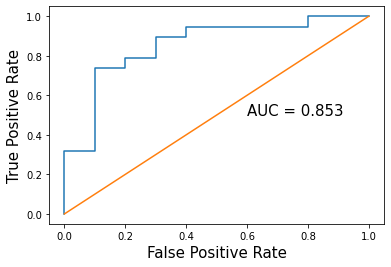

In [5]:
plt.plot(fpr, tpr)
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1))

plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)

plt.text(0.6, 0.5, f'AUC = {str(np.round(auc,3))}', size=15)

In [6]:
for i in range(0, len(regions)):
    auc = metrics.roc_auc_score(y_true[:, i, 0], y_probs[:, i, 0])
    
    print(f"{regions[i]} AUC: ", auc)

global AUC:  0.8526315789473684
roof AUC:  0.831578947368421
sept AUC:  0.7684210526315789
lat AUC:  0.7789473684210526
ant AUC:  0.8421052631578947
post AUC:  0.768421052631579


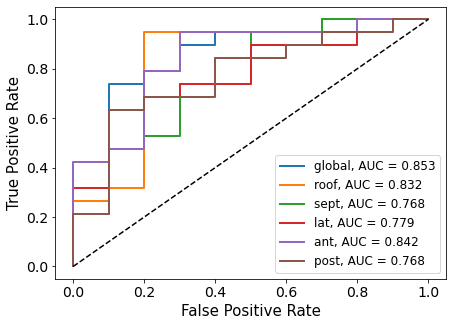

In [30]:
## Plotting all 6 lines on same plot

fig, ((ax1)) = plt.subplots(1,1,figsize=(7,5), facecolor='white', sharey=True)

for i in range(0, len(regions)):
    
    fpr, tpr, thresholds = metrics.roc_curve(y_true[:, i, 0], y_probs[:, i, 0])
    auc = metrics.roc_auc_score(y_true[:, i, 0], y_probs[:, i, 0])
    
    plt.plot(fpr, tpr, label=f"{regions[i]}, AUC = {str(np.round(auc,3))}", lw='2')
    
#     print(len(fpr))
#     print(len(tpr))

ax1.tick_params(axis='both', which='major', labelsize=14)

plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), ls='--', c='black')
plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.legend(fontsize=12)

# plt.text(0.6, 0.5, f'AUC = {str(np.round(auc,3))}', size=15)
# plt.savefig("/home/csi20/Dropbox/phd/Documents/HRS23/roc_analysis.png", dpi=200, bbox_inches="tight")